**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Data Collection and Exploration**

In [3]:
data=pd.read_csv('car_prices_dataset.csv')
data.head()

,Make,Model,Year,Mileage,Engine Size (L),Fuel Type,Transmission,Horsepower,Number of Doors,Price ($)
0,Chevrolet,Cruze,2005,41531,3.3,Diesel,Automatic,272,2,5502.62
1,Honda,Accord,2019,129606,1.1,Diesel,Manual,208,4,11718.97
2,Honda,CR-V,2018,95481,3.7,Diesel,Automatic,425,2,16061.98
3,Audi,A6,2021,122983,2.0,Electric,Automatic,261,2,27599.81
4,Mercedes,GLA,2019,105776,2.5,Electric,Automatic,113,4,37560.61


In [4]:
data.shape

(100, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             100 non-null    object 
 1   Model            100 non-null    object 
 2   Year             100 non-null    int64  
 3   Mileage          100 non-null    int64  
 4   Engine Size (L)  100 non-null    float64
 5   Fuel Type        100 non-null    object 
 6   Transmission     100 non-null    object 
 7   Horsepower       100 non-null    int64  
 8   Number of Doors  100 non-null    int64  
 9   Price ($)        100 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 7.9+ KB


In [6]:
data.describe()

,Year,Mileage,Engine Size (L),Horsepower,Number of Doors,Price ($)
count,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000
mean,2014.580000,101506.26000,3.017000,250.590000,2.84000,16586.673600
std,5.658961,59783.75993,1.102802,110.672791,0.99209,9482.073369
min,2005.000000,6858.00000,1.000000,77.000000,2.00000,5000.000000
25%,2010.750000,43154.75000,2.000000,138.750000,2.00000,9439.452500
50%,2015.000000,108314.00000,2.950000,236.000000,2.00000,14497.045000
75%,2019.000000,151525.00000,3.900000,348.500000,4.00000,21331.452500
max,2023.000000,199515.00000,5.000000,450.000000,4.00000,41117.920000


# **2. Data Preprocessing**

In [7]:
data.isnull().sum()

,0
Make,0
Model,0
Year,0
Mileage,0
Engine Size (L),0
Fuel Type,0
Transmission,0
Horsepower,0
Number of Doors,0
Price ($),0


In [8]:
data.head()

,Make,Model,Year,Mileage,Engine Size (L),Fuel Type,Transmission,Horsepower,Number of Doors,Price ($)
0,Chevrolet,Cruze,2005,41531,3.3,Diesel,Automatic,272,2,5502.62
1,Honda,Accord,2019,129606,1.1,Diesel,Manual,208,4,11718.97
2,Honda,CR-V,2018,95481,3.7,Diesel,Automatic,425,2,16061.98
3,Audi,A6,2021,122983,2.0,Electric,Automatic,261,2,27599.81
4,Mercedes,GLA,2019,105776,2.5,Electric,Automatic,113,4,37560.61


**Convert Categorical Variables: Use one-hot encoding for variables like make, model, fuelType, and transmission.**

In [9]:
data = pd.get_dummies(data, columns=['Make', 'Model', 'Fuel Type', 'Transmission'])

In [10]:
data.head()

,Year,Mileage,Engine Size (L),Horsepower,Number of Doors,Price ($),Make_Audi,Make_BMW,Make_Chevrolet,Make_Ford,...,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_Petrol,Transmission_Automatic,Transmission_Manual
0,2005,41531,3.3,272,2,5502.62,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,2019,129606,1.1,208,4,11718.97,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2018,95481,3.7,425,2,16061.98,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,2021,122983,2.0,261,2,27599.81,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,2019,105776,2.5,113,4,37560.61,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


**Feature Scaling: Standardize numerical features like Mileage, EngineSize, and Horsepower if they have different scales.**

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Mileage', 'Engine Size (L)', 'Horsepower']] = scaler.fit_transform(data[['Mileage', 'Engine Size (L)', 'Horsepower']])

In [12]:
data.head()

,Year,Mileage,Engine Size (L),Horsepower,Number of Doors,Price ($),Make_Audi,Make_BMW,Make_Chevrolet,Make_Ford,...,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_Petrol,Transmission_Automatic,Transmission_Manual
0,2005,-1.008257,0.257912,0.194428,2,5502.62,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,2019,0.472391,-1.747056,-0.386767,4,11718.97,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2018,-0.101292,0.622451,1.583846,2,16061.98,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,2021,0.361050,-0.926842,0.094535,2,27599.81,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,2019,0.071780,-0.471167,-1.249477,4,37560.61,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


# **3. Feature Selection**

**Calculate the Correlation Matrix:** use the correlation matrix to see how strongly each feature correlates with the target variable (Price)

In [34]:
corr_matrix = data.corr()

# Focus on the correlation with the target variable 'Price'
correlation_with_price = corr_matrix['Price ($)'].sort_values(ascending=False)

print(correlation_with_price)


Price ($)                 1.000000
Make_Mercedes             0.564854
Year                      0.476311
Model_GLA                 0.408218
Make_BMW                  0.403012
Model_C-Class             0.294600
Model_5 Series            0.246038
Model_E-Class             0.231076
Make_Audi                 0.228676
Model_X5                  0.212751
Model_3 Series            0.209531
Model_A6                  0.172678
Transmission_Automatic    0.161987
Model_Q5                  0.116841
Fuel Type_Hybrid          0.088110
Model_A4                  0.087529
Number of Doors           0.081221
Fuel Type_Electric        0.074246
Model_Elantra             0.042998
Horsepower               -0.004901
Model_Tucson             -0.021950
Model_Tiguan             -0.033357
Model_Jetta              -0.047333
Model_Accord             -0.051854
Model_Focus              -0.052367
Engine Size (L)          -0.054523
Model_Camry              -0.054860
Model_Malibu             -0.058329
Fuel Type_Petrol    

# **4. Model Development**

**Split the Dataset: Use train_test_split to divide the data into training and testing sets.**

In [15]:
from sklearn.model_selection import train_test_split

X = data.drop('Price ($)', axis=1)
y = data['Price ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Build and Train the Model: Use LinearRegression from sklearn to create and train the model**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 2894868.173476393
R² Score: 0.974628513064853


# **5. Model Evaluation and Interpretation**

Text(0.5, 1.0, 'Actual vs. Predicted Prices')

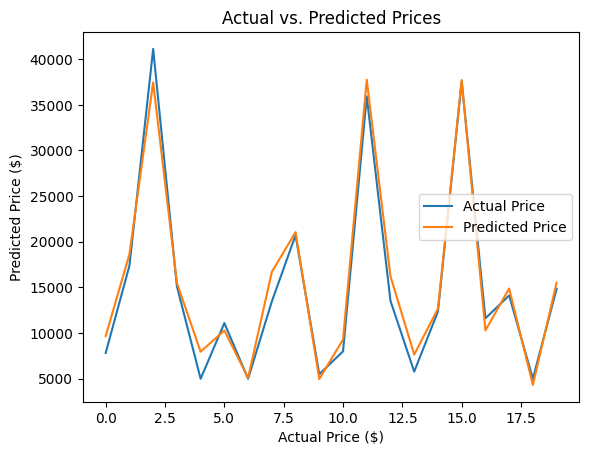

In [17]:
fig, ax = plt.subplots()
ax.plot(range(0,len(y_test)), y_test, label='Actual Price')
ax.plot(range(0,len(y_test)), y_pred, label='Predicted Price')
ax.legend()
ax.set_xlabel('Sample')
ax.set_xlabel('Actual Price ($)')
ax.set_ylabel('Predicted Price ($)')
ax.set_title('Actual vs. Predicted Prices')


**Interpret Coefficients: Examine the coefficients to understand the impact of each feature**

In [19]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                         Coefficient
Year                      807.356044
Mileage                 -2018.577727
Engine Size (L)          1723.167070
Horsepower                -33.111932
Number of Doors           -35.376095
Make_Audi                5478.576333
Make_BMW                 8466.642529
Make_Chevrolet          -3624.574923
Make_Ford               -1965.418477
Make_Honda              -3437.714238
Make_Hyundai            -4872.834139
Make_Kia                -5713.299598
Make_Mercedes           12643.957920
Make_Toyota             -5462.540498
Make_Volkswagen         -1512.794908
Model_3 Series            724.800514
Model_5 Series           4182.983024
Model_A4                  800.451489
Model_A6                 2988.717896
Model_Accord             -502.513395
Model_C-Class            3617.963244
Model_CR-V               -915.155930
Model_Camry             -2207.463813
Model_Civic             -2020.044913
Model_Corolla           -1779.985753
Model_Cruze             -2462.662085
M

# **6. Model Improvement**

In [22]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit the model with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)


LinearRegression()

In [23]:
# Evaluate the model
y_poly_pred = model_poly.predict(X_poly_test)
poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)

print(f'Polynomial Model Mean Squared Error: {poly_mse}')
print(f'Polynomial Model R² Score: {poly_r2}')


Polynomial Model Mean Squared Error: 4914850.474127341
Polynomial Model R² Score: 0.9569247865118581


# **7. Conclusion and Insights**

**Display Model Performance**

In [28]:
# Print out the model's performance metrics
print(f"Model Performance:\nMean Squared Error (MSE): {mse}\nR² Score: {r2}")


Model Performance:
Mean Squared Error (MSE): 2894868.173476393
R² Score: 0.974628513064853


**Analyzing Feature Importance**
use the model's coefficients to see which features most strongly affect car prices.

In [29]:
# Display the coefficients sorted by their absolute values
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)
print(coefficients)


                         Coefficient  Abs_Coefficient
Make_Mercedes           12643.957920     12643.957920
Make_BMW                 8466.642529      8466.642529
Model_GLA                5982.864263      5982.864263
Make_Kia                -5713.299598      5713.299598
Make_Audi                5478.576333      5478.576333
Make_Toyota             -5462.540498      5462.540498
Make_Hyundai            -4872.834139      4872.834139
Model_5 Series           4182.983024      4182.983024
Make_Chevrolet          -3624.574923      3624.574923
Model_C-Class            3617.963244      3617.963244
Model_X5                 3558.858991      3558.858991
Make_Honda              -3437.714238      3437.714238
Model_Optima            -3414.091850      3414.091850
Model_E-Class            3043.130413      3043.130413
Model_A6                 2988.717896      2988.717896
Model_Sonata            -2984.616196      2984.616196
Model_Cruze             -2462.662085      2462.662085
Model_Camry             -220

**Interpreting Results:** Based on the sorted coefficients, identify the top features that influence car prices.

In [30]:
# Top features influencing car prices
top_features = coefficients.head(5)
print("Top features influencing car prices:")
print(top_features)


Top features influencing car prices:
                Coefficient  Abs_Coefficient
Make_Mercedes  12643.957920     12643.957920
Make_BMW        8466.642529      8466.642529
Model_GLA       5982.864263      5982.864263
Make_Kia       -5713.299598      5713.299598
Make_Audi       5478.576333      5478.576333
